<a href="https://colab.research.google.com/github/NourShehab/nlp-project/blob/main/Agmad_Team_Fel_Kon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
import gdown

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("https://raw.githubusercontent.com/NourShehab/nlp-project/main/topSongs.csv", encoding='unicode_escape')

In [ ]:
# #to solve error while importing data
# with open("spotify.csv", "r") as f:
#     for i, line in enumerate(f):
#         if i == 1269:
#            print(line)
#            break

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/NLP/data/spotify_songs.csv")
# url = 'https://www.kaggle.com/datasets/joebeachcapital/57651-spotify-songs/download?datasetVersionNumber=1'
# output = 'dataset.zip'
# gdown.download(url, output, quiet=False)



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP/data/spotify_songs.csv")

In [ ]:
#df=pd.read_csv("/content/spotify.csv")

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe(include='all')

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [ ]:
df=df.rename(columns={'text':'lyrics'})

In [ ]:
brief_cleaning= (re.sub("[^A-Za-z']+", ' ',str(row)).lower() for row in df['lyrics'])

In [ ]:
#txt=[for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

In [ ]:
df_tmp=pd.DataFrame({'clean':brief_cleaning})
df_tmp

,clean
0,look at her face it's a wonderful face and it ...
1,take it easy with me please touch me gently li...
2,i'll never know why i had to go why i had to p...
3,making somebody happy is a question of give an...
4,making somebody happy is a question of give an...
...,...
57645,irie days come on play let the angels fly let ...
57646,power to the workers more power power to the w...
57647,all you need is something i'll believe flashli...
57648,northern star am i frightened where can i go t...


In [ ]:
df['lyrics']=df_tmp['clean']
df

,artist,song,link,lyrics
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face it's a wonderful face and it ...
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently li...
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to p...
3,ABBA,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let ...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the w...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something i'll believe flashli...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go t...


In [ ]:
df=df.dropna().drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   lyrics  57650 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [ ]:
df['lyrics']=[i.lower().replace("\n","") for i in df['lyrics']]
df['artist']=[i.lower().replace("\n","") for i in df['artist']]
df

,artist,song,link,lyrics
0,abba,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face it's a wonderful face and it ...
1,abba,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently li...
2,abba,As Good As New,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to p...
3,abba,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,abba,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...
...,...,...,...,...
57645,ziggy marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let ...
57646,ziggy marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the w...
57647,zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something i'll believe flashli...
57648,zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go t...


In [ ]:
#when dropping links col. df cannot be loaded
# df_with_link=df.copy()
# df = df.drop('link', axis=1, inplace=True)

In [ ]:
#df=df_with_link.copy()

In [ ]:
df['lyrics_no_punct'] = df.loc[:, 'lyrics']
df['lyrics_no_punct'] = df['lyrics_no_punct'].str.replace(r'[^\w\s]+', '')

<ipython-input-18-f7121eec8daf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics_no_punct'] = df['lyrics_no_punct'].str.replace(r'[^\w\s]+', '')


In [ ]:
df['tokens'] = df['lyrics'].apply(word_tokenize)

In [ ]:
df

,artist,song,link,lyrics,lyrics_no_punct,tokens
0,abba,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face it's a wonderful face and it ...,look at her face its a wonderful face and it m...,"[look, at, her, face, it, 's, a, wonderful, fa..."
1,abba,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently li...,take it easy with me please touch me gently li...,"[take, it, easy, with, me, please, touch, me, ..."
2,abba,As Good As New,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to p...,ill never know why i had to go why i had to pu...,"[i, 'll, never, know, why, i, had, to, go, why..."
3,abba,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,..."
4,abba,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,..."
...,...,...,...,...,...,...
57645,ziggy marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let ...,irie days come on play let the angels fly let ...,"[irie, days, come, on, play, let, the, angels,..."
57646,ziggy marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the w...,power to the workers more power power to the w...,"[power, to, the, workers, more, power, power, ..."
57647,zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something i'll believe flashli...,all you need is something ill believe flashlig...,"[all, you, need, is, something, i, 'll, believ..."
57648,zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go t...,northern star am i frightened where can i go t...,"[northern, star, am, i, frightened, where, can..."


In [ ]:
df['song_Length'] = df['lyrics_no_punct'].str.len()
df

,artist,song,link,lyrics,lyrics_no_punct,tokens,song_Length
0,abba,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face it's a wonderful face and it ...,look at her face its a wonderful face and it m...,"[look, at, her, face, it, 's, a, wonderful, fa...",701
1,abba,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently li...,take it easy with me please touch me gently li...,"[take, it, easy, with, me, please, touch, me, ...",1276
2,abba,As Good As New,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to p...,ill never know why i had to go why i had to pu...,"[i, 'll, never, know, why, i, had, to, go, why...",1367
3,abba,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",1143
4,abba,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",1159
...,...,...,...,...,...,...,...
57645,ziggy marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let ...,irie days come on play let the angels fly let ...,"[irie, days, come, on, play, let, the, angels,...",825
57646,ziggy marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the w...,power to the workers more power power to the w...,"[power, to, the, workers, more, power, power, ...",2754
57647,zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something i'll believe flashli...,all you need is something ill believe flashlig...,"[all, you, need, is, something, i, 'll, believ...",1264
57648,zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go t...,northern star am i frightened where can i go t...,"[northern, star, am, i, frightened, where, can...",699


In [ ]:
# grouped = df.groupby('artist')
# average_length = grouped.mean()
grouped= df.groupby(['artist'])['song_Length'].mean().reset_index()


In [ ]:
grouped=grouped.sort_values('song_Length',ascending=False)

<Axes: title={'center': 'Avg Song Length Per Artist'}, xlabel='Artists', ylabel='Avg Length'>

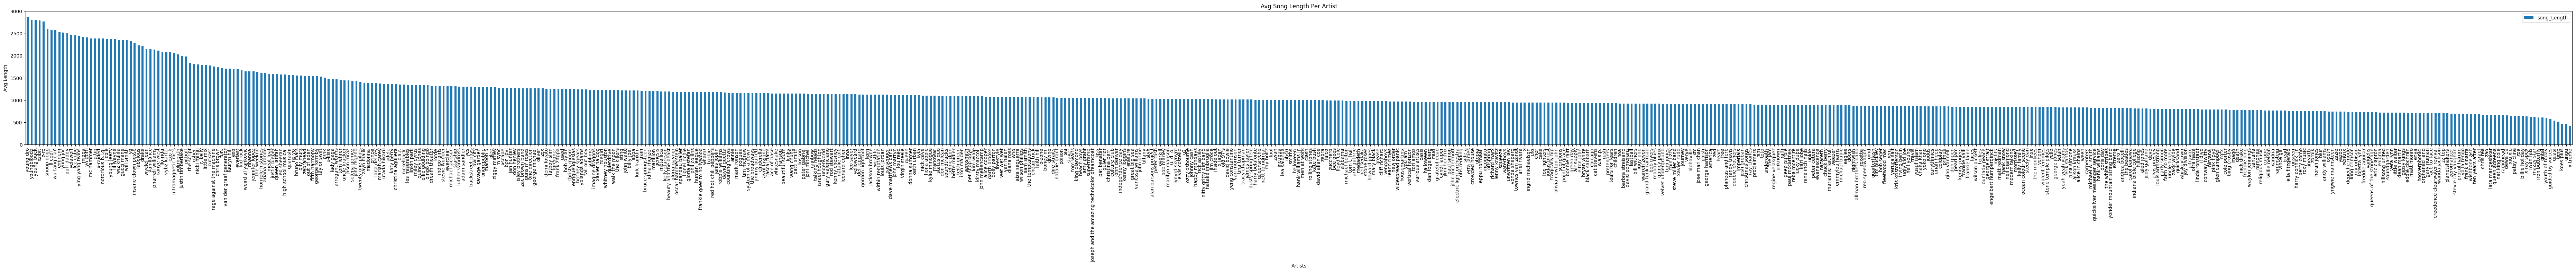

In [ ]:
grouped.plot.bar(x="artist", y="song_Length", figsize=(95, 5),title='Avg Song Length Per Artist', ylabel='Avg Length',
         xlabel='Artists',)

In [ ]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 617 to 591
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist       643 non-null    object 
 1   song_Length  643 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.1+ KB


In [ ]:
#pd.reset_option("max_colwidth")

In [ ]:
nltk.download('popular');
import string
from collections import Counter
from collections import OrderedDict
import glob
from nltk.corpus import stopwords
from collections import defaultdict

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
df['dup_lyrics']=df['lyrics']
df

,artist,song,link,lyrics,lyrics_no_punct,tokens,song_Length,dup_lyrics
0,abba,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face it's a wonderful face and it ...,look at her face its a wonderful face and it m...,"[look, at, her, face, it, 's, a, wonderful, fa...",701,look at her face it's a wonderful face and it ...
1,abba,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently li...,take it easy with me please touch me gently li...,"[take, it, easy, with, me, please, touch, me, ...",1276,take it easy with me please touch me gently li...
2,abba,As Good As New,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to p...,ill never know why i had to go why i had to pu...,"[i, 'll, never, know, why, i, had, to, go, why...",1367,i'll never know why i had to go why i had to p...
3,abba,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",1143,making somebody happy is a question of give an...
4,abba,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",1159,making somebody happy is a question of give an...
...,...,...,...,...,...,...,...,...
57645,ziggy marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play let the angels fly let ...,irie days come on play let the angels fly let ...,"[irie, days, come, on, play, let, the, angels,...",825,irie days come on play let the angels fly let ...
57646,ziggy marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers more power power to the w...,power to the workers more power power to the w...,"[power, to, the, workers, more, power, power, ...",2754,power to the workers more power power to the w...
57647,zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need is something i'll believe flashli...,all you need is something ill believe flashlig...,"[all, you, need, is, something, i, 'll, believ...",1264,all you need is something i'll believe flashli...
57648,zwan,Desire,/z/zwan/desire_20148986.html,northern star am i frightened where can i go t...,northern star am i frightened where can i go t...,"[northern, star, am, i, frightened, where, can...",699,northern star am i frightened where can i go t...


# TF-IDF

In [ ]:
tmp=df[["artist","lyrics"]]

In [ ]:
tmp

,artist,lyrics
0,abba,look at her face it's a wonderful face and it ...
1,abba,take it easy with me please touch me gently li...
2,abba,i'll never know why i had to go why i had to p...
3,abba,making somebody happy is a question of give an...
4,abba,making somebody happy is a question of give an...
...,...,...
57645,ziggy marley,irie days come on play let the angels fly let ...
57646,ziggy marley,power to the workers more power power to the w...
57647,zwan,all you need is something i'll believe flashli...
57648,zwan,northern star am i frightened where can i go t...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tmp['lyrics'])
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(tmp['lyrics'])

def wordList_removeStopWords(artist_text):
    stop = stopwords.words('english') + ['\n']
    wordList = []
    for word in word_tokenize(artist_text.lower().strip()):
        if not word in stop:
            wordList= ' '.join([word])
    return wordList


artist_most_frequent_words = {}
for artist, group in tmp.groupby('artist'):
    artist_text = ' '.join(group['lyrics'])

    words_without_stopwords = wordList_removeStopWords(artist_text)

    artist_tfidf_matrix = tfidf_vectorizer.transform([words_without_stopwords])
    max_tfidf_index = artist_tfidf_matrix.argmax()
    #most_frequent_word = tfidf_vectorizer.get_feature_names()[max_tfidf_index]
    most_frequent_word = count_vectorizer.get_feature_names_out()[max_tfidf_index]
    artist_most_frequent_words[artist] = most_frequent_word
artist_most_frequent_words

{"'n sync": 'love',
 'abba': 'aha',
 'ace of base': 'anyway',
 'adam sandler': 'back',
 'adele': 'young',
 'aerosmith': 'thighs',
 'air supply': 'pass',
 'aiza seguerra': 'aa',
 'alabama': 'everywhere',
 'alan parsons project': 'home',
 'aled jones': 'raise',
 'alice cooper': 'aah',
 'alice in chains': 'aa',
 'alison krauss': 'chorus',
 'allman brothers band': 'yeah',
 'alphaville': 'chains',
 'america': 'friend',
 'amy grant': 'round',
 'andrea bocelli': 'white',
 'andy williams': 'seen',
 'annie': 'long',
 'ariana grande': 'shawty',
 'ariel rivera': 'met',
 'arlo guthrie': 'life',
 'arrogant worms': 'buffet',
 'avril lavigne': 'go',
 'backstreet boys': 'love',
 'barbie': 'yeah',
 'barbra streisand': 'life',
 'beach boys': 'aa',
 'beautiful south': 'meat',
 'beauty and the beast': 'beast',
 'bee gees': 'woman',
 'bette midler': 'wings',
 'bill withers': 'round',
 'billie holiday': 'remember',
 'billy joel': 'll',
 'bing crosby': 'arrested',
 'black sabbath': 'feel',
 'blur': 'love',
 

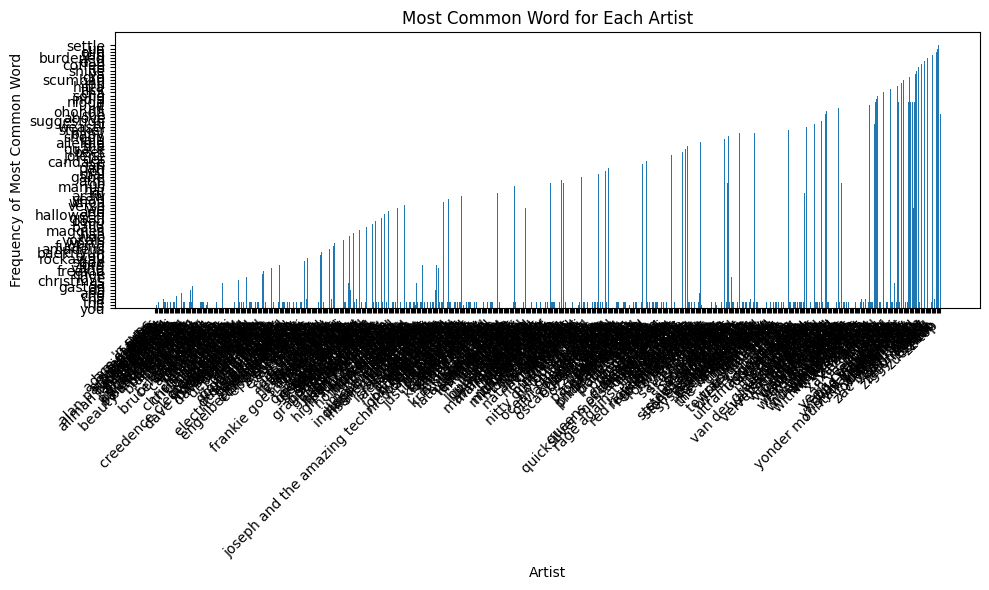

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.bar(artist_most_frequent_words.keys(), artist_most_frequent_words.values())
# plt.xlabel('Artist')
# plt.ylabel('Frequency of Most Common Word')
# plt.title('Most Common Word for Each Artist')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [ ]:
artist_tfidf_most_frequent_word = {}
for artist, word in artist_most_frequent_words.items():
    word_index = tfidf_vectorizer.vocabulary_[word]
    artist_index = tmp[tmp['artist'] == artist].index[0]
    tfidf_score = tfidf_matrix[artist_index, word_index]
    artist_tfidf_most_frequent_word[artist] = tfidf_score

artist_tfidf_most_frequent_word

{"'n sync": 0.3923337656576693,
 'abba': 0.0,
 'ace of base': 0.3002284923730632,
 'adam sandler': 0.0676861312924892,
 'adele': 0.08616566754124146,
 'aerosmith': 0.06689227130274901,
 'air supply': 0.0,
 'aiza seguerra': 0.0,
 'alabama': 0.023679873535298965,
 'alan parsons project': 0.2021174730608092,
 'aled jones': 0.0,
 'alice cooper': 0.11718298998010684,
 'alice in chains': 0.0,
 'alison krauss': 0.13936207909752393,
 'allman brothers band': 0.40143160720240023,
 'alphaville': 0.04674346069879145,
 'america': 0.2451174017526467,
 'amy grant': 0.023174133190565317,
 'andrea bocelli': 0.0,
 'andy williams': 0.023851244661470136,
 'annie': 0.02813932525794947,
 'ariana grande': 0.07337631789877332,
 'ariel rivera': 0.0,
 'arlo guthrie': 0.2443834399333778,
 'arrogant worms': 0.05063998070291397,
 'avril lavigne': 0.01735637649635524,
 'backstreet boys': 0.21476141847862126,
 'barbie': 0.15846701973354765,
 'barbra streisand': 0.0,
 'beach boys': 0.0,
 'beautiful south': 0.08875947

In [ ]:
# def create_artist_lyrics_dict(dataset):
#   artist_lyrics_dict = {}
#   for artist in dataset:
#       if artist not in artist_lyrics_dict:
#           artist_lyrics_dict[artist] = lyrics
#       else:
#         artist_lyrics_dict[artist]= artist_lyrics_dict[artist]+lyrics
#   return artist_lyrics_dict

In [ ]:
keys=tmp['artist'].tolist()

values=tmp['lyrics'].tolist()

In [ ]:
#artist_lyrics_dict=dict(zip(keys, values))


In [ ]:
names=list(set(tmp['artist']))
len(names)

643

In [ ]:
# lyr_list=[]
# for name in names:
#   print(name)
#   temp_array=[]
#   for item in tmp.index:
#     if name == tmp['artist'][item]:
#       print(tmp['artist'][item])
#       print(tmp['lyrics'][item])
#       temp_array.append(tmp['lyrics'][item])
#       print(temp_array)
#   lyr_list.append(temp_array)

In [ ]:
# lyr_list

In [ ]:
# len(lyr_list)

In [ ]:
# for name in keys:
#     # Access the lyrics associated with the current artist
#     lyrics_list = artist_lyrics_dict[name]
#     # Initialize a variable to store combined lyrics
#     combined_lyrics = ""
#     for item in range(len(lyrics_list)):
#         # Concatenate the lyrics with a space between them
#         combined_lyrics += " " + lyrics_list[item]
#     # Update the artist_lyrics_dict with the combined lyrics
#     artist_lyrics_dict[name] = combined_lyrics.strip()

In [ ]:
# create_artist_lyrics_dict(tmp)

# Things to justify not doing

-Punctuation
-lemmatization
-spelling
-stopwords removal


In [ ]:
#WordCloud
# text = df["review"]

# wordcloud = wc.WordCloud(
#     width = 3000,
#     height = 2000,
#     stopwords = wc.STOPWORDS).generate(str(text))

# fig = plt.figure(
#     figsize = (40, 30),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')